In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
ztbl = Table.read('zcat.deep2.dr4.fits.gz', format='fits')
zcat = ztbl.to_pandas() # convert to pandas dataframe
zcat.head()

,OBJNO,RA,DEC,MAGB,MAGR,MAGI,MAGBERR,MAGRERR,MAGIERR,RG,...,ZBEST,ZERR,ZQUALITY,CLASS,SUBCLASS,RCHI2,DOF,VDISP,VDISPERR,COMMENT
0,11001673,213.868704,51.956445,23.487745,23.143082,22.582092,0.026491,0.022043,0.029253,1.369818,...,-1.000000,999.900024,2,b'NONE ',b'NONE ',0.630934,57,999.900024,999.900024,b'bcol; bext ...
1,11001699,213.810471,51.942316,22.067692,20.034674,19.545080,0.009000,0.001478,0.002079,1.957290,...,0.290608,0.000043,4,b'GALAXY',b'NONE ',1.178153,5901,166.334991,49.481255,b' ...
2,11001770,213.848431,51.948876,24.144438,24.103180,24.020006,0.068268,0.076603,0.152493,2.184211,...,-1.000000,-5.000000,1,b'GALAXY',b'NONE ',1.047260,5318,184.860001,195.000000,b' ...
3,11001800,213.831758,51.952548,25.336836,23.508480,23.081087,0.169422,0.033245,0.049654,1.795907,...,-1.000000,-5.000000,1,b'GALAXY',b'NONE ',1.014062,5788,0.000000,0.000000,b' ...
4,11001860,213.832550,51.954174,24.382738,23.401484,22.572845,0.079261,0.033940,0.035031,2.023320,...,0.957669,0.000099,4,b'GALAXY',b'NONE ',1.039979,5952,109.394997,17.208755,b' ...


In [3]:
print(zcat.head(0))

Empty DataFrame
Columns: [OBJNO, RA, DEC, MAGB, MAGR, MAGI, MAGBERR, MAGRERR, MAGIERR, RG, E2, PA, PGAL, SFD_EBV, M_B, UB, OBJNAME, MASK, SLIT, DATE, MJD, SLITRA, SLITDEC, SLITPA, SLITLEN, Z, ZBEST, ZERR, ZQUALITY, CLASS, SUBCLASS, RCHI2, DOF, VDISP, VDISPERR, COMMENT]
Index: []

[0 rows x 36 columns]


In [4]:
zcat = zcat[zcat['ZQUALITY'] >= 3] # remove stars/sources with low accuracy or no redshift calculations
zcat = zcat[zcat['ZBEST'] != -1] # remove stars, redundant if ZQUALITY >= 3
zcat = zcat[zcat['ZERR'] >= 0] # ZERR < 0 indicates problematic fit

In [5]:
zcat_comms = zcat['COMMENT'].str.decode('UTF-8') # bytes to strings
zcat = zcat.assign(COMSTR=zcat_comms.values) # add decoded comments as new column
zcat_ser = zcat[zcat['COMSTR'].str.contains('ser')] # select rows with comments that refer to serendips
zcat_not_ser = zcat[zcat['COMSTR'].str.contains('ser') == False] # untested; should select only non-serendip rows

In [6]:
zcat_offser = zcat_ser[zcat_ser['COMSTR'].str.contains('offser')] # specify offset serendips
zcat_supser = zcat_ser[zcat_ser['COMSTR'].str.contains('supser')] # specify superimposed serendips

In [7]:
print(len(zcat))
print(len(zcat_supser))
print(len(zcat_offser))
print(len(zcat_not_ser)) #test to make sure serendip numbers match up with zcat_not_ser 

36708
181
1168
35387


In [8]:
%matplotlib auto
#for closer view of diagram
plt.figure(1) #redshift histogram
plt.hist(zcat_not_ser['Z'], bins=50,range=(0,2.2), label='non-serendips')
plt.hist(zcat_offser['Z'], bins=50, range=(0,2.2), label='offser')
plt.hist(zcat_supser['Z'], bins=50, range=(0,2.2), color='black', label='supser')
plt.xlabel('Redshift')
plt.ylabel('# of galaxies')
plt.legend(prop={'size': 10})
plt.title('Redshift Histogram')

Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'Redshift Histogram')

Text(0.5, 1.0, 'Redshift Histogram')

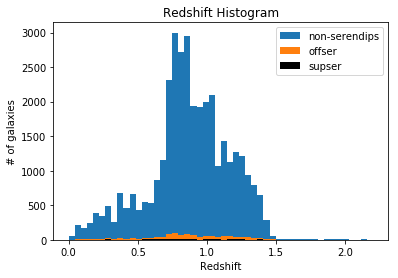

In [9]:
%matplotlib inline
plt.figure(1) #redshift histogram
plt.hist(zcat_not_ser['Z'], bins=50,range=(0,2.2), label='non-serendips')
plt.hist(zcat_offser['Z'], bins=50, range=(0,2.2), label='offser')
plt.hist(zcat_supser['Z'], bins=50, range=(0,2.2), color='black', label='supser')
plt.xlabel('Redshift')
plt.ylabel('# of galaxies')
plt.legend(prop={'size': 10})
plt.title('Redshift Histogram')

In [10]:
%matplotlib auto
#for closer view of diagram
plt.figure(2)
plt.plot(zcat_not_ser['Z'], zcat_not_ser['MAGB'], 'bo', ms=2)
plt.plot(zcat_offser['Z'], zcat_offser['MAGB'], 'y>', label='>=offser-B', ms=2.5)
plt.plot(zcat_supser['Z'], zcat_supser['MAGB'], '>', color='orange', label='>=supser-B', ms=2.5)

plt.plot(zcat_not_ser['Z'], zcat_not_ser['MAGR'], 'ro', ms=2)
plt.plot(zcat_offser['Z'], zcat_offser['MAGR'], 'y<', label='<=offser-R', ms=2.5)
plt.plot(zcat_supser['Z'], zcat_supser['MAGR'], '<', color='orange', label='<=supser-R', ms=2.5)

plt.plot(zcat_not_ser['Z'], zcat_not_ser['MAGI'], 'co', ms=2)
plt.plot(zcat_offser['Z'], zcat_offser['MAGR'], 'y^', label='^=offser-R', ms=2.5)
plt.plot(zcat_supser['Z'], zcat_supser['MAGR'], '^', color='orange', label='^=supser-R', ms=2.5)

plt.xlabel('Redshift')
plt.ylabel('Apparent Magnitude')
plt.legend(prop={'size': 10})
plt.title('Redshift vs Apparent Magnitude (B, R, and I Magnitude)')


Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'Redshift vs Apparent Magnitude (B, R, and I Magnitude)')

Text(0.5, 1.0, 'Redshift vs Apparent Magnitude (B, R, and I Magnitude)')

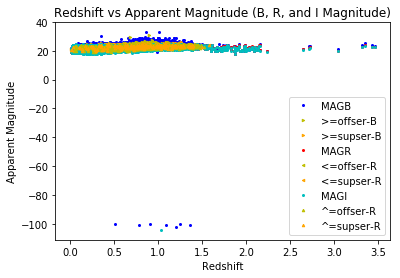

In [11]:
%matplotlib inline

plt.figure(2)
plt.plot(zcat_not_ser['Z'], zcat_not_ser['MAGB'], 'bo', ms=2)
plt.plot(zcat_offser['Z'], zcat_offser['MAGB'], 'y>', label='>=offser-B', ms=2.5)
plt.plot(zcat_supser['Z'], zcat_supser['MAGB'], '>', color='orange', label='>=supser-B', ms=2.5)

plt.plot(zcat_not_ser['Z'], zcat_not_ser['MAGR'], 'ro', ms=2)
plt.plot(zcat_offser['Z'], zcat_offser['MAGR'], 'y<', label='<=offser-R', ms=2.5)
plt.plot(zcat_supser['Z'], zcat_supser['MAGR'], '<', color='orange', label='<=supser-R', ms=2.5)

plt.plot(zcat_not_ser['Z'], zcat_not_ser['MAGI'], 'co', ms=2)
plt.plot(zcat_offser['Z'], zcat_offser['MAGR'], 'y^', label='^=offser-R', ms=2.5)
plt.plot(zcat_supser['Z'], zcat_supser['MAGR'], '^', color='orange', label='^=supser-R', ms=2.5)

plt.xlabel('Redshift')
plt.ylabel('Apparent Magnitude')
plt.legend(prop={'size': 10})
plt.title('Redshift vs Apparent Magnitude (B, R, and I Magnitude)')


In [12]:
zcat['MAGB'].idxmin() #what row lowest MAGB value is

16331

In [13]:
zcat.T[16331] #finding out why the value is so off

OBJNO                                                14023783
RA                                                    215.565
DEC                                                   53.4433
MAGB                                                 -102.337
MAGR                                                  23.1196
MAGI                                                  23.2013
MAGBERR                                                     0
MAGRERR                                              0.102024
MAGIERR                                              0.578469
RG                                                    8.88832
E2                                                   0.310066
PA                                                    26.0713
PGAL                                                       -1
SFD_EBV                                            0.00768634
M_B                                                      -999
UB                                                       -999
OBJNAME 

In [14]:
zcat_bad = zcat[zcat['COMSTR'].str.contains('bext' or 'bsky')] # select rows with comments that refer to bext
zcat_not_bad = zcat[zcat['COMSTR'].str.contains('bext' or 'bsky') == False] #rows without bext

In [15]:
%matplotlib auto
#for closer view of diagram
plt.figure(2)
plt.plot(zcat_not_bad['Z'], zcat_not_bad['MAGB'], 'bo', ms=2)
plt.plot(zcat_offser['Z'], zcat_offser['MAGB'], 'y>', label='>=offser-B', ms=2.5)
plt.plot(zcat_supser['Z'], zcat_supser['MAGB'], '>', color='orange', label='>=supser-B', ms=2.5)

plt.plot(zcat_not_bad['Z'], zcat_not_bad['MAGR'], 'ro', ms=2)
plt.plot(zcat_offser['Z'], zcat_offser['MAGR'], 'y<', label='<=offser-R', ms=2.5)
plt.plot(zcat_supser['Z'], zcat_supser['MAGR'], '<', color='orange', label='<=supser-R', ms=2.5)

plt.plot(zcat_not_bad['Z'], zcat_not_bad['MAGI'], 'co', ms=2)
plt.plot(zcat_offser['Z'], zcat_offser['MAGI'], 'y^', label='^=offser-I', ms=2.5)
plt.plot(zcat_supser['Z'], zcat_supser['MAGI'], '^', color='orange', label='^=supser-I', ms=2.5)

plt.xlabel('Redshift')
plt.ylabel('Apparent Magnitude')
plt.legend(prop={'size': 10})
plt.title('Redshift vs Apparent Magnitude (B, R, and I Magnitude)')

Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'Redshift vs Apparent Magnitude (B, R, and I Magnitude)')

Text(0.5, 1.0, 'Redshift vs Apparent Magnitude (B, R, and I Magnitude)')

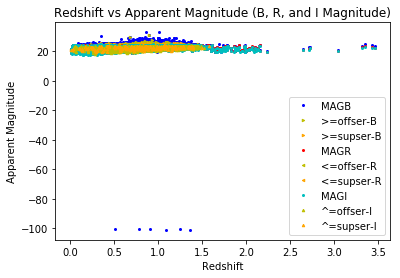

In [16]:
%matplotlib inline
plt.figure(2)
plt.plot(zcat_not_bad['Z'], zcat_not_bad['MAGB'], 'bo', ms=2)
plt.plot(zcat_offser['Z'], zcat_offser['MAGB'], 'y>', label='>=offser-B', ms=2.5)
plt.plot(zcat_supser['Z'], zcat_supser['MAGB'], '>', color='orange', label='>=supser-B', ms=2.5)

plt.plot(zcat_not_bad['Z'], zcat_not_bad['MAGR'], 'ro', ms=2)
plt.plot(zcat_offser['Z'], zcat_offser['MAGR'], 'y<', label='<=offser-R', ms=2.5)
plt.plot(zcat_supser['Z'], zcat_supser['MAGR'], '<', color='orange', label='<=supser-R', ms=2.5)

plt.plot(zcat_not_bad['Z'], zcat_not_bad['MAGI'], 'co', ms=2)
plt.plot(zcat_offser['Z'], zcat_offser['MAGI'], 'y^', label='^=offser-I', ms=2.5)
plt.plot(zcat_supser['Z'], zcat_supser['MAGI'], '^', color='orange', label='^=supser-I', ms=2.5)

plt.xlabel('Redshift')
plt.ylabel('Apparent Magnitude')
plt.legend(prop={'size': 10})
plt.title('Redshift vs Apparent Magnitude (B, R, and I Magnitude)')

In [17]:
zcat_not_bad['MAGB'].idxmin() #what row lowest MAGB value is

13766

In [18]:
zcat.T[13766] #finding out why the value is so off

OBJNO                                                13064204
RA                                                    215.382
DEC                                                   53.2622
MAGB                                                 -101.071
MAGR                                                  23.6595
MAGI                                                  22.6723
MAGBERR                                                     0
MAGRERR                                             0.0590822
MAGIERR                                             0.0411421
RG                                                    2.86647
E2                                                   0.120826
PA                                                    5.57725
PGAL                                                       -1
SFD_EBV                                            0.00936212
M_B                                                      -999
UB                                                       -999
OBJNAME 

**Nothing wrong with the observed galaxy above according to the data and the comments. Ask Raja why this may be!** (Probably a serendip that was not commented on based on the what Mr. Cooper said in emails)

*For now use the first graph for the Redshift vs Apparent Magnitude graph since it contains all data*

In [23]:
%matplotlib auto
#for closer view of diagram
plt.figure(3) #rest frame U–B color vs. rest frame absolute B magnitude
plt.plot(zcat_not_ser['M_B'], zcat_not_ser['UB'], 'bo')
plt.plot(zcat_offser['Z'], zcat_offser['MAGB'], 'y>', label='>=offser-B')
plt.plot(zcat_supser['Z'], zcat_supser['MAGB'], '>', color='orange', label='>=supser-B')
plt.xlabel('Absolute MAGB')
plt.ylabel('Rest frame U-B')
plt.legend(prop={'size': 10})
plt.title('Rest Frame U–B vs. Rest Frame Asolute MAGB')

Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'Rest Frame U–B vs. Rest Frame Asolute MAGB')

Text(0.5, 1.0, 'Rest Frame U–B vs. Rest Frame Asolute MAGB')

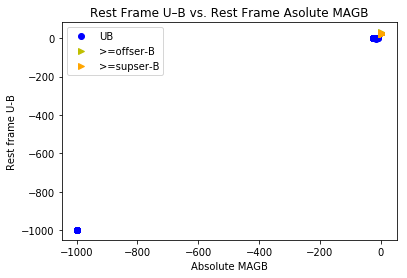

In [20]:
%matplotlib inline
plt.figure(3) #rest frame U–B color vs. rest frame absolute B magnitude
plt.plot(zcat_not_ser['M_B'], zcat_not_ser['UB'], 'bo')
plt.plot(zcat_offser['Z'], zcat_offser['MAGB'], 'y>', label='>=offser-B')
plt.plot(zcat_supser['Z'], zcat_supser['MAGB'], '>', color='orange', label='>=supser-B')
plt.xlabel('Absolute MAGB')
plt.ylabel('Rest frame U-B')
plt.legend(prop={'size': 10})
plt.title('Rest Frame U–B vs. Rest Frame Asolute MAGB')

In [21]:
zcat['M_B'].idxmin() #what row is bright galaxy

5026

In [22]:
zcat.T[5026] #bright galaxy stats

OBJNO                                                12005053
RA                                                    214.054
DEC                                                   52.4412
MAGB                                                  23.7084
MAGR                                                  22.7148
MAGI                                                  22.5456
MAGBERR                                             0.0356947
MAGRERR                                             0.0286881
MAGIERR                                             0.0365901
RG                                                    1.89802
E2                                                  0.0278272
PA                                                   -16.9662
PGAL                                                 0.620634
SFD_EBV                                             0.0110697
M_B                                                      -999
UB                                                       -999
OBJNAME 

**This galaxy is suspiciously bright!**